### Decision Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: Qt5Agg


#### Get the Data 

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


EDA

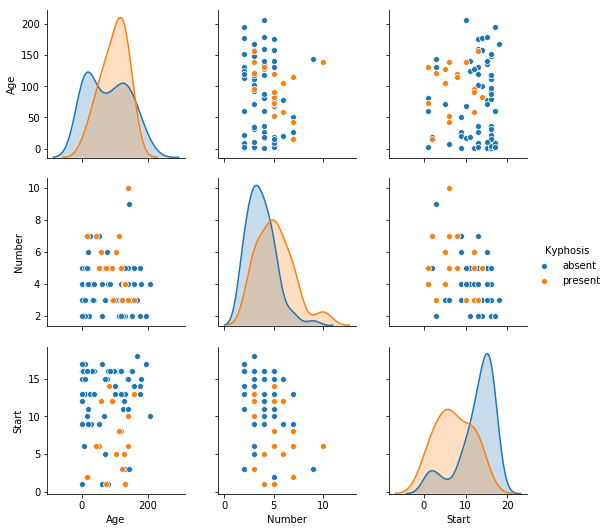

In [4]:
sns.pairplot(df, hue='Kyphosis')

Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Prediction and Eavaluation 

In [10]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
conf_matrix = confusion_matrix(y_test, predictions)
accuracy=accuracy_score(y_test, predictions)

In [13]:
conf_matrix

array([[20,  2],
       [ 2,  1]], dtype=int64)

In [14]:
accuracy

0.84

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.91      0.91      0.91        22
     present       0.33      0.33      0.33         3

    accuracy                           0.84        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.84      0.84      0.84        25



In [16]:
print(confusion_matrix(y_test, predictions))

[[20  2]
 [ 2  1]]


Tree Visualization

In [17]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

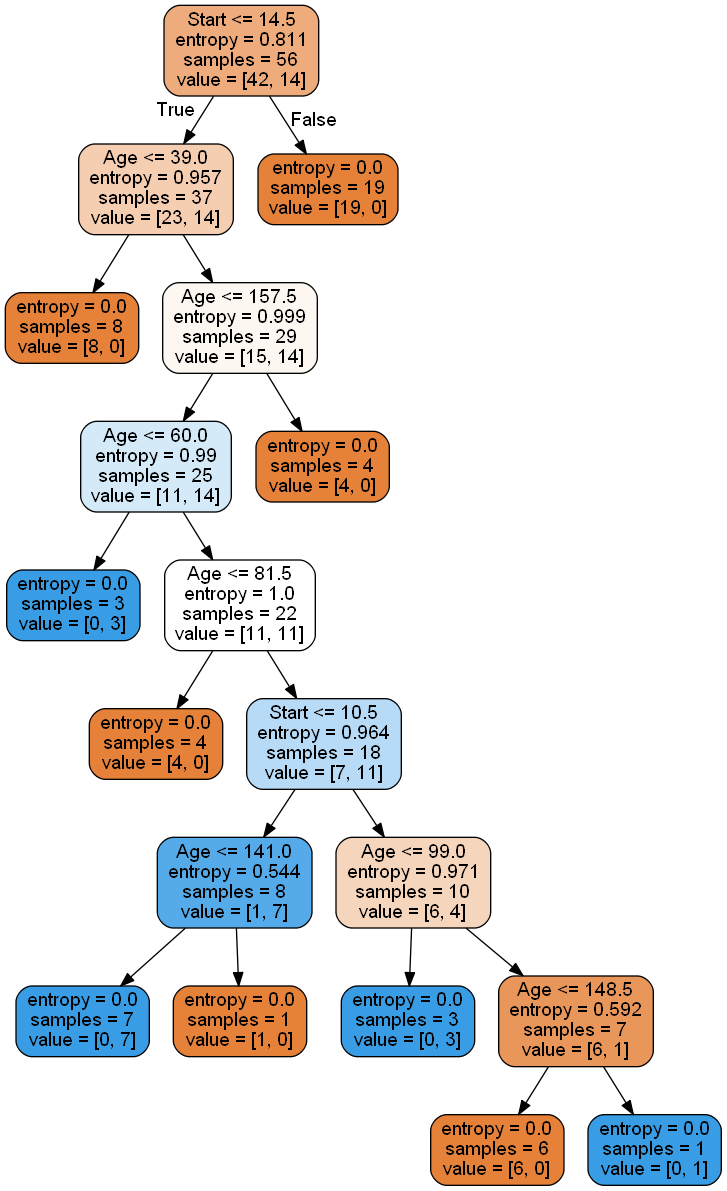

In [19]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Random Forests
Now let's compare the decision tree model to a random forest.

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rfc_predict = rfc.predict(X_test)

In [23]:
print(confusion_matrix(y_test, rfc_predict))

[[20  2]
 [ 2  1]]


In [24]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

      absent       0.91      0.91      0.91        22
     present       0.33      0.33      0.33         3

    accuracy                           0.84        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.84      0.84      0.84        25

